In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = "/content/drive/MyDrive/Brain_Tumor_Classification/Training"
test_dir  = "/content/drive/MyDrive/Brain_Tumor_Classification/Testing"

In [5]:
import os

print("Training exists:", os.path.exists(train_dir))
print("Testing exists:", os.path.exists(test_dir))

print("Training folders:", os.listdir(train_dir))
print("Testing folders:", os.listdir(test_dir))

Training exists: True
Testing exists: True
Training folders: ['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'no_tumor']
Testing folders: ['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'no_tumor']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=test_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 1155s 13s/step - accuracy: 0.4453 - loss: 1.3186 - val_accuracy: 0.3274 - val_loss: 1.7821
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 542ms/step - accuracy: 0.6263 - loss: 0.8749 - val_accuracy: 0.3782 - val_loss: 2.0765
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 533ms/step - accuracy: 0.6700 - loss: 0.7501 - val_accuracy: 0.3985 - val_loss: 2.2392
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 533ms/step - accuracy: 0.7176 - loss: 0.6559 - val_accuracy: 0.4619 - val_loss: 1.9302
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 537ms/step - accuracy: 0.7562 - loss: 0.5927 - val_accuracy: 0.5279 - val_loss: 1.6195
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 526ms/step - accuracy: 0.7607 - loss: 0.5566 - val_accuracy: 0.5254 - val_loss: 1.8893
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 531ms/step - accuracy: 0.8073 - loss: 0.4908 - val_accuracy: 0.4848 - val_loss: 1.9805
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 525ms/step - accuracy: 0.8078 - loss: 0.4510 - val_accu

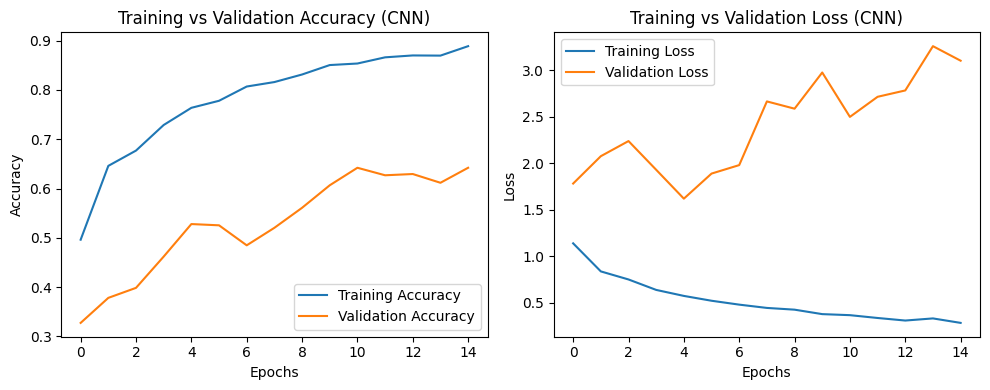

In [13]:
import matplotlib.pyplot as plt

# Create figure with two plots
plt.figure(figsize=(10,4))

# ---- Plot 1: Accuracy ----
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (CNN)')
plt.legend()

# ---- Plot 2: Loss ----
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (CNN)')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
import numpy as np

# Predict probabilities
y_prob = model.predict(test_gen)

# Predicted class labels
y_pred = np.argmax(y_prob, axis=1)

# True class labels
y_true = test_gen.classes

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step


In [15]:
class_names = list(test_gen.class_indices.keys())
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


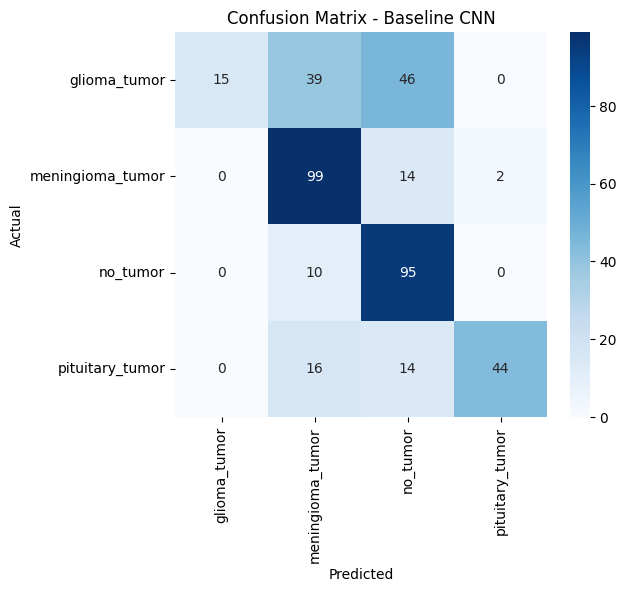

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline CNN")
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.15      0.26       100
meningioma_tumor       0.60      0.86      0.71       115
        no_tumor       0.56      0.90      0.69       105
 pituitary_tumor       0.96      0.59      0.73        74

        accuracy                           0.64       394
       macro avg       0.78      0.63      0.60       394
    weighted avg       0.76      0.64      0.60       394



In [18]:
# index of no_tumor class
no_tumor_idx = class_names.index("no_tumor")

# 1 = tumor, 0 = no_tumor
y_true_binary = np.where(y_true == no_tumor_idx, 0, 1)
y_pred_binary = np.where(y_pred == no_tumor_idx, 0, 1)

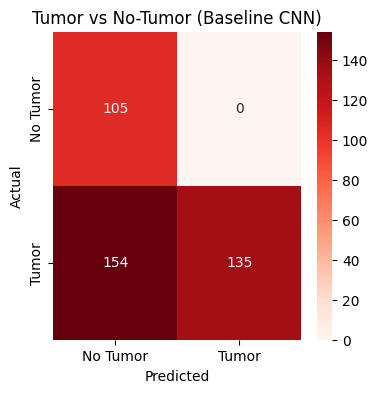

In [ ]:
from sklearn.metrics import confusion_matrix

cm_bin = confusion_matrix(y_true_binary, y_pred_binary)

plt.figure(figsize=(4,4))
sns.heatmap(cm_bin, annot=True, fmt='d',
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"],
            cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tumor vs No-Tumor (Baseline CNN)")
plt.show()

In [19]:
print(classification_report(
    y_true_binary,
    y_pred_binary,
    target_names=["No Tumor", "Tumor"]
))

              precision    recall  f1-score   support

    No Tumor       0.56      0.90      0.69       105
       Tumor       0.96      0.74      0.84       289

    accuracy                           0.79       394
   macro avg       0.76      0.82      0.77       394
weighted avg       0.85      0.79      0.80       394



In [21]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [22]:
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
for layer in base_model.layers:
    layer.trainable = False

In [24]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=output)

In [25]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
history_tl = model_tl.fit(
    train_gen,
    epochs=15,
    validation_data=test_gen
)

Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 822ms/step - accuracy: 0.3466 - loss: 1.4913 - val_accuracy: 0.4086 - val_loss: 1.2101
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 50s 557ms/step - accuracy: 0.6150 - loss: 0.9086 - val_accuracy: 0.4518 - val_loss: 1.2546
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 526ms/step - accuracy: 0.7109 - loss: 0.7244 - val_accuracy: 0.4746 - val_loss: 1.2802
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 539ms/step - accuracy: 0.7341 - loss: 0.6558 - val_accuracy: 0.4924 - val_loss: 1.3183
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 527ms/step - accuracy: 0.7822 - loss: 0.5936 - val_accuracy: 0.5076 - val_loss: 1.3092
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 535ms/step - accuracy: 0.7818 - loss: 0.5552 - val_accuracy: 0.5533 - val_loss: 1.3483
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 522ms/step - accuracy: 0.8036 - loss: 0.5132 - val_accuracy: 0.5635 - val_loss: 1.3795
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 537ms/step - accuracy: 0.8000 - loss: 0.5457 - val_accu

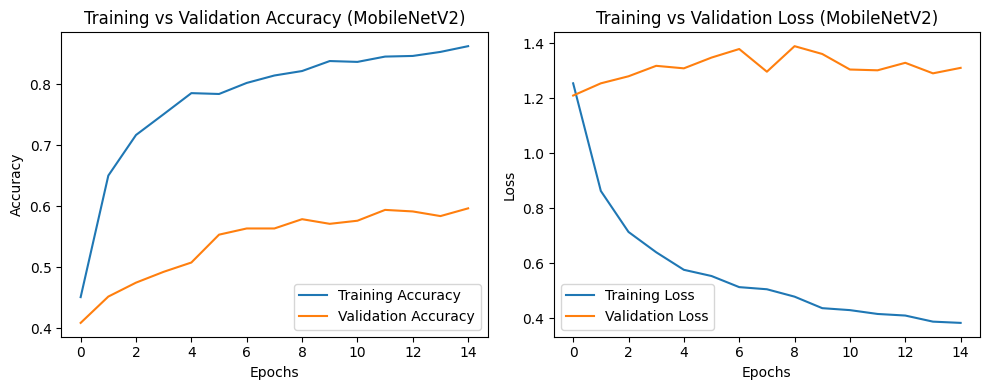

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Plot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['accuracy'], label='Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (MobileNetV2)')
plt.legend()

# Plot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (MobileNetV2)')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
import numpy as np

y_prob_tl = model_tl.predict(test_gen)
y_pred_tl = np.argmax(y_prob_tl, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 489ms/step


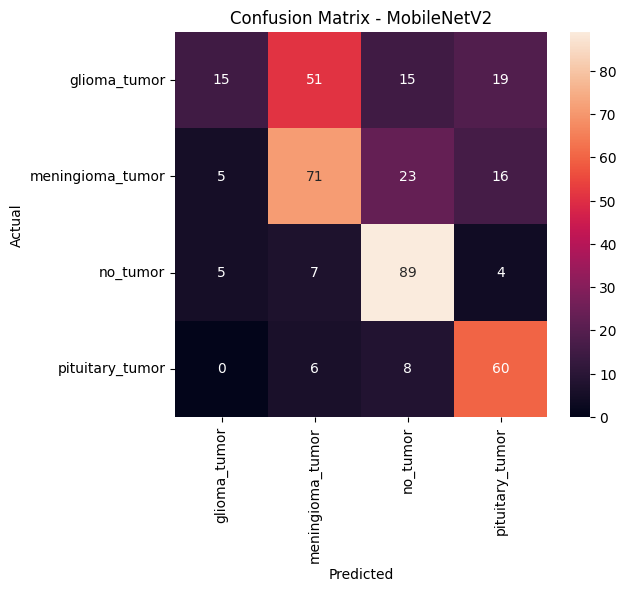

                  precision    recall  f1-score   support

    glioma_tumor       0.60      0.15      0.24       100
meningioma_tumor       0.53      0.62      0.57       115
        no_tumor       0.66      0.85      0.74       105
 pituitary_tumor       0.61      0.81      0.69        74

        accuracy                           0.60       394
       macro avg       0.60      0.61      0.56       394
    weighted avg       0.60      0.60      0.55       394



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_tl)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MobileNetV2")
plt.show()

print(classification_report(y_true, y_pred_tl, target_names=class_names))

In [31]:
no_tumor_idx = class_names.index("no_tumor")

y_true_bin = np.where(y_true == no_tumor_idx, 0, 1)
y_pred_bin = np.where(y_pred_tl == no_tumor_idx, 0, 1)

print(classification_report(
    y_true_bin,
    y_pred_bin,
    target_names=["No Tumor", "Tumor"]
))

              precision    recall  f1-score   support

    No Tumor       0.66      0.85      0.74       105
       Tumor       0.94      0.84      0.89       289

    accuracy                           0.84       394
   macro avg       0.80      0.84      0.81       394
weighted avg       0.86      0.84      0.85       394

